In [1]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Desktop\\TicketOptimization\\beef.csv')
df.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


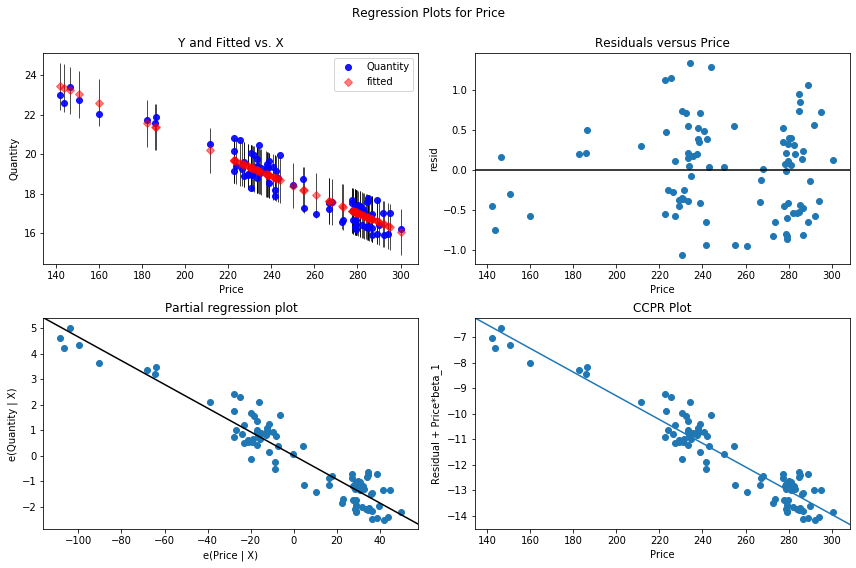

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Price', fig=fig)

In [4]:
df.corr()

,Year,Quarter,Quantity,Price
Year,1.000000,-0.025076,-0.837540,0.858335
Quarter,-0.025076,1.000000,0.026875,0.018096
Quantity,-0.837540,0.026875,1.000000,-0.949283
Price,0.858335,0.018096,-0.949283,1.000000


In [67]:
df.columns

Index(['Year', 'Quarter', 'Quantity', 'Price'], dtype='object')

In [4]:
cols = ['Quarter', 'Quantity', 'Price']
df_cols = df[cols]

In [5]:
df_cols = df_cols.astype({"Quarter": str})

In [6]:
df_dummies = pd.get_dummies(df_cols, drop_first=True)
#df_dummies.drop('Quarter_4', inplace=True, axis =1)

In [7]:
df_dummies.corr()

,Quantity,Price,Quarter_2,Quarter_3,Quarter_4
Quantity,1.000000,-0.949283,0.024760,0.153170,-0.088739
Price,-0.949283,1.000000,0.027187,0.018737,-0.006197
Quarter_2,0.024760,0.027187,1.000000,-0.338235,-0.328395
Quarter_3,0.153170,0.018737,-0.338235,1.000000,-0.328395
Quarter_4,-0.088739,-0.006197,-0.328395,-0.328395,1.000000


In [94]:
df_dummies.head()

,Quantity,Price,Quarter_2,Quarter_3,Quarter_4
0,22.9976,142.1667,0,0,0
1,22.6131,143.9333,1,0,0
2,23.4054,146.5000,0,1,0
3,22.7401,150.8000,0,0,1
4,22.0441,160.0000,0,0,0


In [8]:
y = df_dummies['Quantity']
x1 = df_dummies.drop('Quantity', axis=1)

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     362.7
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           6.01e-53
Time:                        09:50:18   Log-Likelihood:                -51.602
No. Observations:                  91   AIC:                             113.2
Df Residuals:                      86   BIC:                             125.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7472      0.323     91.984      0.000      29.104      30.390
Price         -0.0469      0.001    -37.477      0.000      -0.049      -0.044
Quarter_2      0.5562      0.130      4.295      0.000       0.299       0.814
Quarter_3      0.9293      0.129      7.177      0.000       0.672       1.187
Quarter_4      0.0965      0.131      0.737      0.463      -0.164       0.357
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.811
Skew:                           0.109   Prob(JB):                        0.666
Kurtosis:                       2.592   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Price,Revenue,Quantity
2,320,4885.28,15.2665


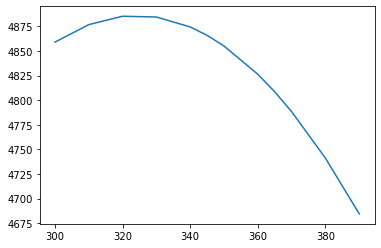

In [165]:
Price = [300, 310, 320, 330, 340, 345, 350, 360, 365, 370, 380, 390] # a range of different prices to find the optimum one 
cost = 0 # a fixed cost in this case 
Revenue = [] 
Quantity = []

q2, q3, q4 = 0, 0, 1

for i in Price:     
    quantity_demanded=30.05-0.0465*i + 0.5562*q2 + 0.9293*q3 + 0.0965*q4  
    #quantity_demanded=30.05-0.0438*i + 0.5431*q2 + 0.9179*q3 + 0.0798*q4 - 0.0202*2000  #With 'Year'
    Quantity.append(quantity_demanded)
    Revenue.append((i-cost)*quantity_demanded) # profit function  

#create data frame of price and revenue  
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue, "Quantity": Quantity}) 
#plot revenue against price 
plt.plot(profit["Price"], profit["Revenue"])
profit[profit['Revenue'] == profit['Revenue'].max()]



In [166]:
p = np.array(profit[profit['Revenue'] == profit['Revenue'].max()]['Price'])[0]
r = np.array(profit[profit['Revenue'] == profit['Revenue'].max()]['Revenue'])[0]
q = np.array(profit[profit['Revenue'] == profit['Revenue'].max()]['Quantity'])[0]

In [167]:
p,r,q

(320, 4885.280000000001, 15.266500000000002)

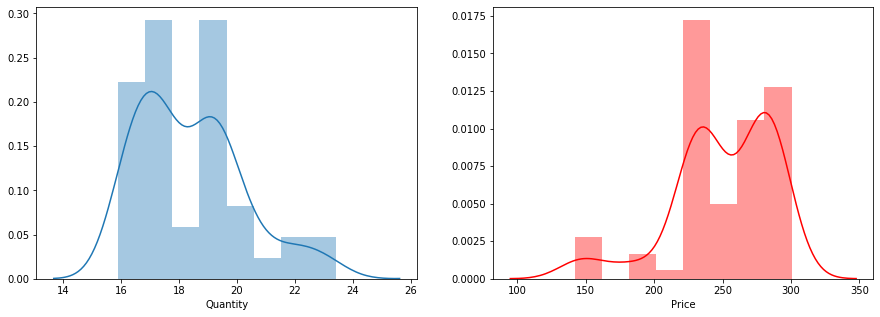

In [109]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.distplot(df['Quantity'])

plt.subplot(1,2,2)
sns.distplot(df['Price'], color ='r')

In [110]:
df.skew()

Year        0.003658
Quarter     0.017828
Quantity    0.758028
Price      -1.099011
dtype: float64

# PRICE ALONE

In [7]:
model = ols("Quantity ~ Price", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.69e-46
Time:                        11:59:26   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

,Price,Revenue,Quantity
2,320,4854.4,15.17


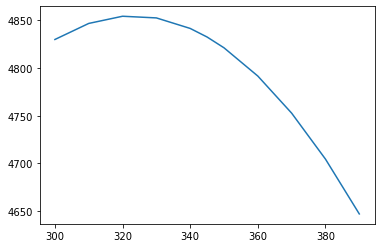

In [142]:
Price = [300, 310, 320, 330,340, 345, 350, 360, 370, 380, 390] # a range of different prices to find the optimum one 
cost = 0 # a fixed cost in this case 
Revenue = [] 
Quantity = []
for i in Price:     
    quantity_demanded=30.05-0.0465*i
    Quantity.append(quantity_demanded)
    Revenue.append((i-cost)*quantity_demanded) # profit function  

#create data frame of price and revenue  
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue, "Quantity": Quantity}) 
#plot revenue against price 
plt.plot(profit["Price"], profit["Revenue"])
profit[profit['Revenue'] == profit['Revenue'].max()]


In [143]:
def plot_quantiles(data, cat_column, num_column):
    
    from warnings import filterwarnings
    filterwarnings("ignore")
    
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(3,1,1)
    data.groupby(cat_column)[num_column].quantile(0.25).plot(color = 'g');
    plt.xlabel("Quantile 1")
    
    plt.subplot(3,1,2)
    data.groupby(cat_column)[num_column].quantile(0.75).plot(color = 'r');
    plt.xlabel("Quantile 3")
    
    plt.subplot(3,1,3)
    sns.boxplot(data = data, x = cat_column, y=num_column)

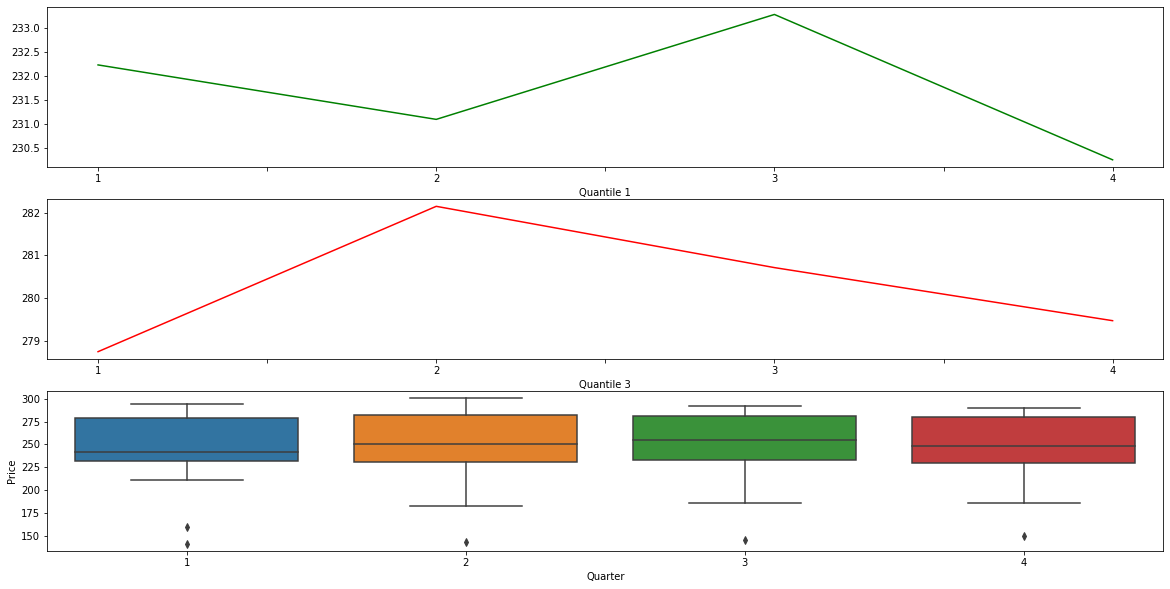

In [144]:
plot_quantiles(df_cols, 'Quarter', 'Price')